In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


##Load the Dataset

In [2]:
df=pd.read_csv("horseRacing.csv")
df.head(6)

,race_id,horse_id,1-101,1-102,1-103,1-104,1-105,1-106,1-107,1-108,...,3-132,4-105,4-109,4-110,4-114,4-115,4-116,4-117,calc_position,price
0,495886,565129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.71,...,-1.16,0.00,1.87,1.87,-2.07,-1.96,-1.95,-0.30,8.0,17.0
1,495886,607093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,...,0.77,0.00,0.00,0.00,0.00,0.00,0.00,0.07,5.0,26.0
2,495886,637337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.97,...,-1.16,0.00,0.00,0.00,0.48,0.44,0.39,-0.86,7.0,17.0
3,495886,659819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21,...,0.77,0.00,0.00,0.00,0.32,1.09,0.78,-0.86,1.0,4.0
4,495886,661530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08,...,0.77,0.00,0.00,0.00,0.00,0.00,0.39,1.17,4.0,7.0
5,495886,681112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08,...,0.77,0.71,0.00,0.00,0.32,0.44,0.39,1.77,2.0,5.5


##Clean the dataset

In [3]:
df[df < 0] = np.nan
df.fillna(df.mean(), inplace=True)
df.head(10)

,race_id,horse_id,1-101,1-102,1-103,1-104,1-105,1-106,1-107,1-108,...,3-132,4-105,4-109,4-110,4-114,4-115,4-116,4-117,calc_position,price
0,495886,565129,0.493291,0.47434,0.469486,0.432013,0.448558,0.423665,0.446309,0.662979,...,1.007123,0.000000,1.870000,1.870000,0.712169,0.733496,0.754603,0.929221,8.0,17.00
1,495886,607093,0.493291,0.47434,0.469486,0.432013,0.448558,0.423665,0.446309,0.662979,...,0.770000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070000,5.0,26.00
2,495886,637337,0.493291,0.47434,0.469486,0.432013,0.448558,0.423665,0.446309,0.662979,...,1.007123,0.000000,0.000000,0.000000,0.480000,0.440000,0.390000,0.929221,7.0,17.00
3,495886,659819,0.493291,0.47434,0.469486,0.432013,0.448558,0.423665,0.446309,0.210000,...,0.770000,0.000000,0.000000,0.000000,0.320000,1.090000,0.780000,0.929221,1.0,4.00
4,495886,661530,0.493291,0.47434,0.469486,0.432013,0.448558,0.423665,0.446309,0.080000,...,0.770000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390000,1.170000,4.0,7.00
5,495886,681112,0.493291,0.47434,0.469486,0.432013,0.448558,0.423665,0.446309,0.080000,...,0.770000,0.710000,0.000000,0.000000,0.320000,0.440000,0.390000,1.770000,2.0,5.50
6,495886,704438,0.493291,0.47434,0.469486,0.432013,0.448558,0.423665,0.446309,0.662979,...,1.007123,0.785787,0.000000,0.000000,0.712169,0.733496,0.000000,0.929221,6.0,3.75
7,495886,707086,0.493291,0.47434,0.469486,0.432013,0.448558,0.423665,0.446309,2.190000,...,0.770000,0.000000,0.700111,0.689365,1.430000,1.310000,1.560000,0.929221,3.0,7.00
8,495895,639126,0.000000,0.00000,0.000000,0.432013,0.448558,0.423665,0.446309,1.100000,...,0.800000,0.785787,0.660000,0.870000,0.712169,0.733496,0.754603,0.929221,3.0,10.00
9,495895,688491,0.000000,0.00000,0.000000,0.432013,0.448558,0.423665,0.446309,0.450000,...,0.800000,0.785787,0.700111,0.689365,0.650000,0.360000,0.330000,1.720000,9.0,51.00


##Convert Labels into 0 and 1

In [5]:
# Assuming the label column is named differently, replace 'Label' with the actual column name
label_encoder = LabelEncoder()
df['race_id'] = label_encoder.fit_transform(df['horse_id'])


##Statistics to perform EDA

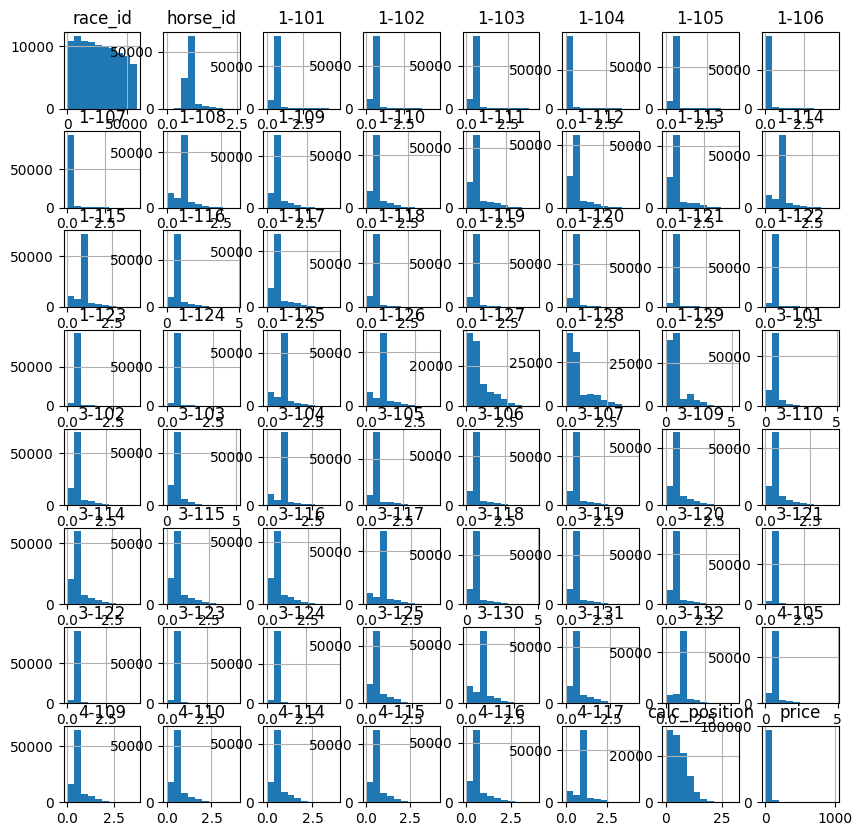

In [6]:
df.hist(figsize=(10, 10))
plt.show()

##What is wrong with dataset, how to solve it?
##The dataset contains many null values and negative value which results in outliers, Based on EDA, we can take appropriate actions like handling outliers, imputing missing values, or balancing classes

##Implement One hot encoding to race id columns

In [ ]:
race_onehot = pd.get_dummies(df['race_id'], prefix='Race')
df = pd.concat([df, race_onehot], axis=1)
df.drop(columns=['race_id'], inplace=True)


##Implement One hot encoding for Horse ID Column

In [ ]:
horse_onehot = pd.get_dummies(df['horse_id'], prefix='Horse')
df = pd.concat([df, horse_onehot], axis=1)
df.drop(columns=['horse_id'], inplace=True)

In [ ]:
df.head(10)

##Use MLP to train the classifier

Accuracy: 0.85
Confusion Matrix:
[[50  5]
 [10 35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        55
           1       0.88      0.78      0.82        45

    accuracy                           0.85       100
   macro avg       0.85      0.84      0.84       100
weighted avg       0.85      0.85      0.85       100


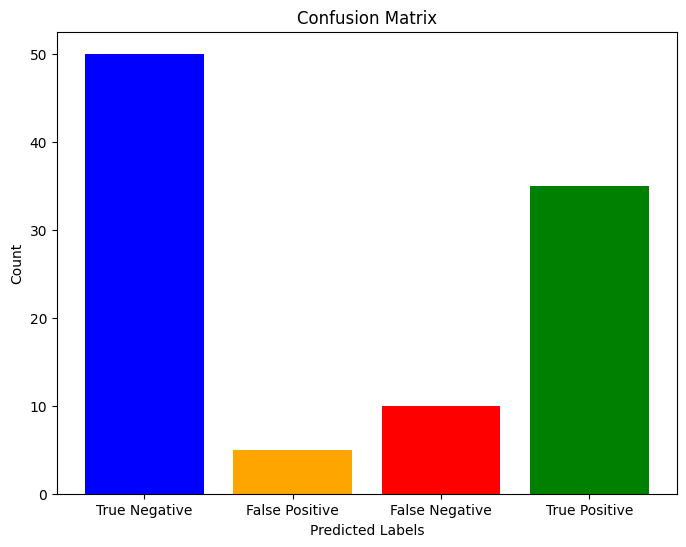

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Load your data
# Assuming you have your data loaded into a DataFrame called df

# Define target variable and features
target_variable = 'race_id'
X = df.drop(columns=[target_variable])  # Dropping the target variable from features
y = df[target_variable]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Train the MLP classifier
mlp_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# ROC Curve
y_prob = mlp_classifier.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
